Connect to the database¶
Let us first load the SQL extension and establish a connection with the database

The syntax for connecting to magic sql using sqllite is
%sql sqlite://DatabaseName

where DatabaseName will be your .db file

In [4]:
%load_ext sql
print("all done")

The sql extension is already loaded. To reload it, use:
  %reload_ext sql
all done


In [19]:
import csv, sqlite3

con = sqlite3.connect("socioeconomic.db")
cur = con.cursor()
print("all done")

all done


In [21]:
%sql sqlite:///socioeconomic.db

Store the dataset in a Table
In many cases the dataset to be analyzed is available as a .CSV (comma separated values) file, perhaps on the internet. To analyze the data using SQL, it first needs to be stored in the database.
We will first read the csv files from the given url into pandas dataframes
Next we will be using the df.to_sql() function to convert each csv file to a table in sqlite with the csv data loaded in it.

In [23]:
import pandas
df = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
df.to_sql("chicago_socioeconomic_data", con, if_exists='replace', index=False,method="multi")


78

In [25]:
%sql SELECT * FROM chicago_socioeconomic_data limit 5;

 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [49]:
#HOW MANY ROWS IN DATASET
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data;

 * sqlite:///socioeconomic.db
Done.


COUNT(*)
78


In [51]:
#HOW MANY AREAS HAVE A HARSHIP_INDEX > 50.0
%sql SELECT COUNT(*) ca FROM chicago_socioeconomic_data WHERE hardship_index>50.0;

 * sqlite:///socioeconomic.db
Done.


ca
38


In [53]:
#MAX HARSHIP VALUE 
%sql SELECT MAX(hardship_index) FROM chicago_socioeconomic_data;

 * sqlite:///socioeconomic.db
Done.


MAX(hardship_index)
98.0


In [55]:
# WHICH AREA HAS THE HIGHEST HARDSHIP INDEX
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE hardship_index = 98;

 * sqlite:///socioeconomic.db
Done.


community_area_name
Riverdale


In [57]:
#WHICH CHICAGO COMM. AREAS HAVE PER-CAPITA INCOME > $60K
%sql SELECT community_area_name FROM chicago_socioeconomic_data where per_capita_income_ > 60000;

 * sqlite:///socioeconomic.db
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


In [63]:
#Create a scatter plot using the variables per_capita_income_ and hardship_index. Explain the correlation between the two variables.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

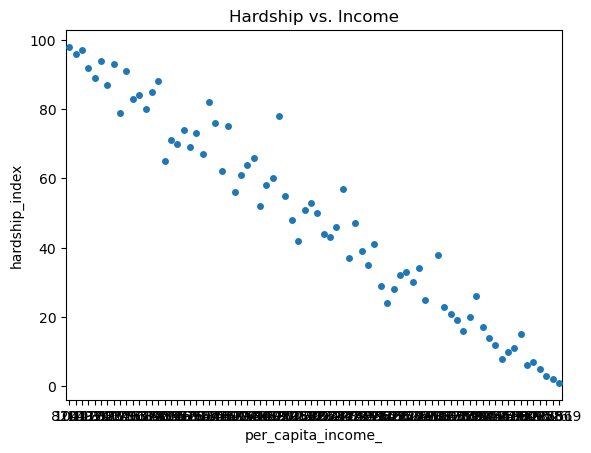

In [69]:
plot = sns.swarmplot(x="per_capita_income_", y="hardship_index", data=df)
plt.title("Hardship vs. Income")
plt.show

 * sqlite:///socioeconomic.db
Done.


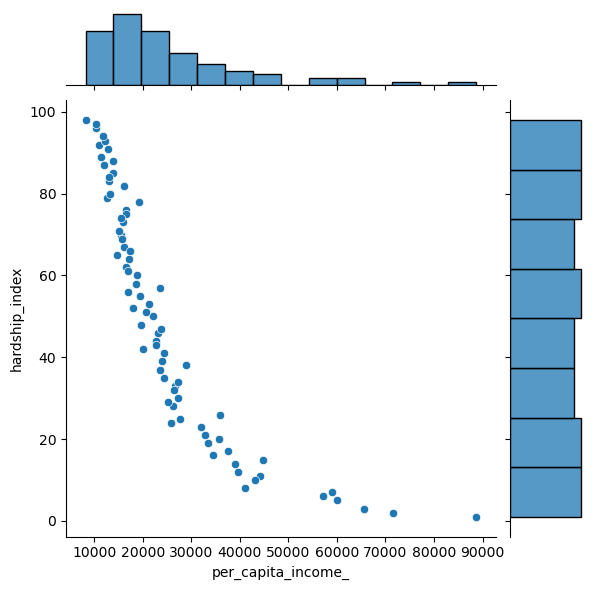

In [71]:
income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())